Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Open Data

In [12]:
X_train=np.load("/content/mobel_Data/X_train.npy")/255
X_test=np.load("/content/mobel_Data/X_test.npy")/255
X_val=np.load("/content/mobel_Data/X_val.npy")/255
Y_train=np.load("/content/mobel_Data/Y_train.npy")
Y_test=np.load("/content/mobel_Data/Y_test.npy")
Y_val=np.load("/content/mobel_Data/Y_val.npy")

0 = air_conditioner
1 = car_horn
2 = children_playing
3 = dog_bark
4 = drilling
5 = engine_idling
6 = gun_shot
7 = jackhammer
8 = siren
9 = street_music

In [30]:
class_index={0:"Air Conditioner",
             1:"Car horn",
             2:"children_playing",
             3:"dog_bark",
             4:"drilling",
             5:"engine_idling",
             6:"gun_Shot",
             7:"jackhammer",
             8:"siren",
             9:"street musıc"}

In [13]:
print(X_train.shape,len(X_train),len(X_val),len(X_test))

(6985, 64, 64, 1) 6985 874 873


CNN model

In [14]:
model = tf.keras.Sequential()

In [15]:
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 activation="relu",
                                 padding="same",
                                 input_shape=X_train.shape[1:]
                                 ))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [16]:
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 padding="same",
                                 activation="relu",
                                 ))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 padding="same",
                                 activation="relu",
                                 ))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [17]:
model.add(tf.keras.layers.Flatten())

In [18]:
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [19]:
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [20]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

In [21]:
results = model.fit(X_train,Y_train,
                    batch_size=128,
                    epochs=100,
                    validation_data=(X_val,Y_val))

Epoch 1/100
55/55 [==============================] - 12s 39ms/step - loss: 2.1059 - accuracy: 0.2090 - val_loss: 1.7343 - val_accuracy: 0.4062
Epoch 2/100
55/55 [==============================] - 2s 29ms/step - loss: 1.8099 - accuracy: 0.3204 - val_loss: 1.4789 - val_accuracy: 0.4966
Epoch 3/100
55/55 [==============================] - 2s 29ms/step - loss: 1.5988 - accuracy: 0.4072 - val_loss: 1.2192 - val_accuracy: 0.5618
Epoch 4/100
55/55 [==============================] - 2s 28ms/step - loss: 1.4515 - accuracy: 0.4680 - val_loss: 1.0567 - val_accuracy: 0.6556
Epoch 5/100
55/55 [==============================] - 2s 28ms/step - loss: 1.3019 - accuracy: 0.5323 - val_loss: 0.9595 - val_accuracy: 0.6922
Epoch 6/100
55/55 [==============================] - 2s 29ms/step - loss: 1.2187 - accuracy: 0.5704 - val_loss: 0.9095 - val_accuracy: 0.7105
Epoch 7/100
55/55 [==============================] - 2s 28ms/step - loss: 1.1053 - accuracy: 0.6135 - val_loss: 0.8289 - val_accuracy: 0.7437
Epoch

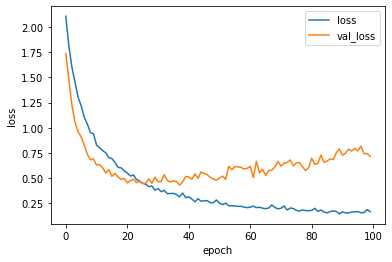

In [22]:
plt.plot(results.history["loss"],label="loss")
plt.plot(results.history["val_loss"],label="val_loss")


plt.xlabel("epoch")
plt.ylabel("loss")

plt.legend()

plt.show()

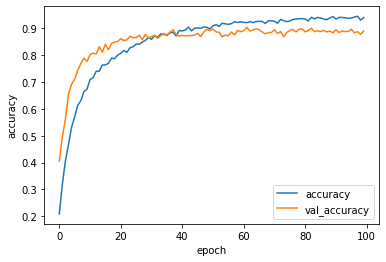

In [23]:
plt.plot(results.history["accuracy"],label="accuracy")
plt.plot(results.history["val_accuracy"],label="val_accuracy")


plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.legend()

plt.show()

In [25]:
print(X_test[550],Y_test[550])

[[[0.97647059]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.97647059]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.97647059]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 ...

 [[0.97647059]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.97647059]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.99607843]
  [0.97647059]
  [0.97647059]
  ...
  [0.97647059]
  [0.97647059]
  [0.97647059]]] 4


In [42]:
class_index[Y_test[750]]

'Car horn'

In [36]:
def test(spectogram):
    prediction_result = model.predict(spectogram.reshape(-1,64,64,1))
    predicted_class = prediction_result.argmax()

    predicted_probability = prediction_result.max()
    print(f"Sesin {class_index[predicted_class]} olma olasılıgı {predicted_probability}")

In [38]:
test(X_test[750])

Sesin Car horn olma olasılıgı 0.999919056892395
